In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv(r"E:\AIML College\Assignment Six\dataset - dataset.csv")
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [3]:
df.shape

(253680, 22)

In [4]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [6]:
df.nunique()

Diabetes_012             3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [7]:
df["PhysActivity"].value_counts()

PhysActivity
1    191920
0     61760
Name: count, dtype: int64

In [8]:
df["PhysActivity"].value_counts().sum()

253680

In [9]:
df["PhysActivity"].unique()

array([0, 1], dtype=int64)

In [10]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [11]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [12]:
x=df.drop(['PhysActivity'],axis=1)

In [13]:
x.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,0,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [14]:
y=df['PhysActivity']
y.head()

0    0
1    1
2    0
3    1
4    1
Name: PhysActivity, dtype: int64

In [15]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

In [16]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 253680 entries, 0 to 253679
Series name: PhysActivity
Non-Null Count   Dtype
--------------   -----
253680 non-null  int64
dtypes: int64(1)
memory usage: 1.9 MB


In [17]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [18]:
Mental_health=pd.get_dummies(x['MentHlth'], drop_first=True)

In [19]:
x=pd.concat([x,Mental_health], axis=1)

In [20]:
x.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,Fruits,Veggies,...,21,22,23,24,25,26,27,28,29,30
0,0,1,1,1,40,1,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False
1,0,0,0,0,25,1,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,0,1,1,1,28,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,True
3,0,1,0,1,27,0,0,0,1,1,...,False,False,False,False,False,False,False,False,False,False
4,0,1,1,1,24,0,0,0,1,1,...,False,False,False,False,False,False,False,False,False,False


In [21]:
Sex=pd.get_dummies(x['Sex'], drop_first=True)

In [22]:
Education=pd.get_dummies(x['Education'], drop_first=True)

In [23]:
Income=pd.get_dummies(x['Income'], drop_first=True)

In [24]:
x=pd.concat([x,Sex,Education,Income], axis=1)

In [25]:
x.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,Fruits,Veggies,...,4,5,6,2,3,4,5,6,7,8
0,0,1,1,1,40,1,0,0,0,1,...,True,False,False,False,True,False,False,False,False,False
1,0,0,0,0,25,1,0,0,0,0,...,False,False,True,False,False,False,False,False,False,False
2,0,1,1,1,28,0,0,0,1,0,...,True,False,False,False,False,False,False,False,False,True
3,0,1,0,1,27,0,0,0,1,1,...,False,False,False,False,False,False,False,True,False,False
4,0,1,1,1,24,0,0,0,1,1,...,False,True,False,False,False,True,False,False,False,False


In [26]:
x=x.drop(['MentHlth', 'Sex', 'Education', 'Income'], axis=1)

In [27]:
x.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,Fruits,Veggies,...,4,5,6,2,3,4,5,6,7,8
0,0,1,1,1,40,1,0,0,0,1,...,True,False,False,False,True,False,False,False,False,False
1,0,0,0,0,25,1,0,0,0,0,...,False,False,True,False,False,False,False,False,False,False
2,0,1,1,1,28,0,0,0,1,0,...,True,False,False,False,False,False,False,False,False,True
3,0,1,0,1,27,0,0,0,1,1,...,False,False,False,False,False,False,False,True,False,False
4,0,1,1,1,24,0,0,0,1,1,...,False,True,False,False,False,True,False,False,False,False


In [28]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [29]:
inc_edu = df.groupby("Income")["Education"].sum().sort_values(ascending=False).head(10).reset_index()
fig = px.bar(inc_edu, x="Income", y="Education", title="Income vs Education", color_discrete_sequence=px.colors.qualitative.Dark2)
fig.show()


Text(0.5, 1.0, 'Income vs Age')

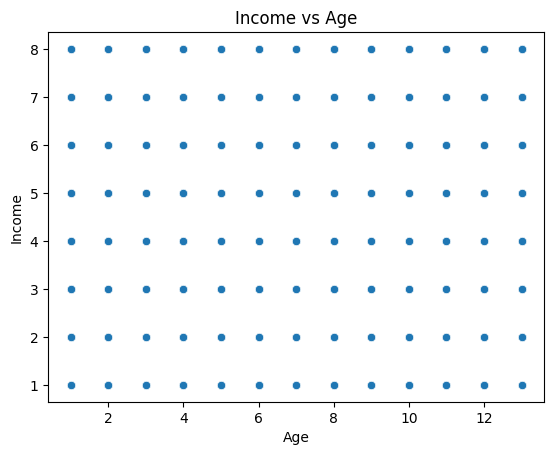

In [30]:
#Scatter Plot
sns.scatterplot(data=df, y="Income", x="Age")
plt.title("Income vs Age")

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [32]:
# regressor = LinearRegression()
# regressor.fit(x_train,y_train)
# x_train.columns = x_train.columns.astype(str)
# regressor.fit(x_train, y_train)

from sklearn.linear_model import LinearRegression

x_train.columns = x_train.columns.astype(str)
x_test.columns = x_test.columns.astype(str)

# Define and fit the model
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# Make predictions
y_pred = regressor.predict(x_test)



In [33]:
# y_pred = regressor.predict(x_test)
# Convert both train and test column names to string
x_train.columns = x_train.columns.astype(str)
x_test.columns = x_test.columns.astype(str)

# Fit and predict again
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)


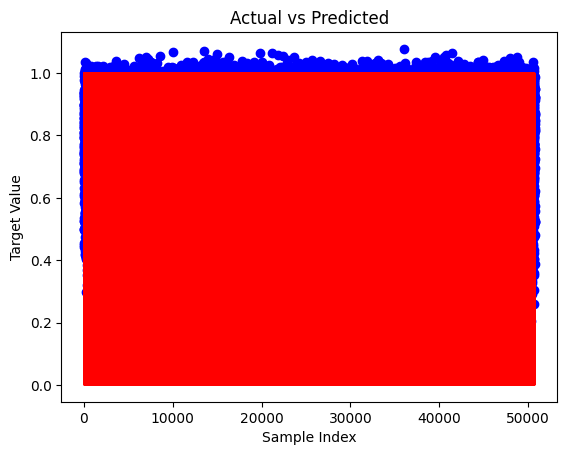

In [34]:
plt.plot(y_test.values, label='Actual', color='red', linewidth=1)
plt.scatter(range(len(y_pred)), y_pred, label='Predicted', color='blue')

plt.title('Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.show()


In [35]:
regressor.coef_

array([-0.00608345, -0.00452827,  0.00024929,  0.04347291, -0.00463007,
       -0.01524581, -0.0010901 ,  0.00402677,  0.07707987,  0.09240878,
       -0.00508801,  0.02807051,  0.00862336, -0.03782784, -0.00324579,
       -0.1307923 , -0.00495511,  0.03290149,  0.02520918,  0.02336431,
        0.01433532,  0.01299651,  0.02723181,  0.0001964 ,  0.01447948,
        0.00567934,  0.0053184 ,  0.1349847 ,  0.04373552,  0.05622399,
       -0.02092931,  0.00148372, -0.00868886,  0.0716496 ,  0.04177727,
        0.1907917 ,  0.00039684, -0.00374693,  0.04009526,  0.12908483,
        0.04471239, -0.01246049,  0.09838299, -0.00330978, -0.03333728,
       -0.02061571, -0.03815953,  0.02938546,  0.00203498, -0.00941295,
        0.02085245,  0.0660161 ,  0.10143043, -0.00659282, -0.02267485,
       -0.02553762, -0.01852568, -0.01223496,  0.00161001,  0.01973404])

In [36]:
regressor.intercept_

0.7941975763312241

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

df["Disease"] = df["Diabetes_012"].apply(lambda x: 0 if x == 0 else 1)

X = df.drop(["Diabetes_012", "Disease"], axis=1)
y = df["Disease"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8481157363607694

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92     42741
           1       0.55      0.19      0.28      7995

    accuracy                           0.85     50736
   macro avg       0.71      0.58      0.60     50736
weighted avg       0.82      0.85      0.82     50736

